In [1]:
%matplotlib inline

In [34]:
from collections import defaultdict
from operator import itemgetter
import os
import random
import string
import sys
import time
import numpy as np
import pandas as pd


def generate_dataset(
        nb_dim,
        n_samples,
        mixing_factor):
    """
    Generates a dataset such that columns c and z are perfectly predictive of y,
    but with additional features x_i that are weakly predictive
    (and co-correlated).
    Parameters
    ----------
    nb_dim : int
    n_samples : int
    Returns
    -------
    df : pd.DataFrame
    """
    X, y, weights, cov = generate_continuous_data_and_targets(nb_dim, n_samples,mixing_factor)
    df_cat = pd.DataFrame(
        X, columns=['x{}'.format(i) for i in range(X.shape[1])])
    df_cat = pd.DataFrame(y, columns=['y']).join(df_cat)
    return df_cat, weights, cov


def generate_continuous_data_and_targets(
        n_dim,
        n_samples,
        mixing_factor=0.025):
    """
    Generates a multivariate Gaussian-distributed dataset and a response
    variable that is conditioned on a weighted sum of the data.
    Parameters
    ----------
    n_dim : int
    n_samples : int
    mixing_factor : float
        'Squashes' the weighted sum into the linear regime of a sigmoid.
        Smaller numbers squash closer to 0.5.
    Returns
    -------
    X : np.array
        (n_samples, n_dim)
    y : np.array
        (n_samples, )
    """
    cov = generate_positive_semi_definite_matrix(n_dim)
    X = np.random.multivariate_normal(
            mean=np.zeros(n_dim),
            cov=cov,
            size=n_samples)
    weights = np.random.randn(n_dim)
    y_probs = sigmoid(mixing_factor * np.dot(X, weights))
    y = np.random.binomial(1, p=y_probs)
    return X, y, weights, cov


def generate_positive_semi_definite_matrix(n_dim):
    """
    Creates a positive semi-definite matrix.
    Parameters
    ----------
    n_dim : int
    Returns
    -------
    np.array : (n_dim, n_dim)
    """
    cov = np.random.randn(n_dim, n_dim)
    return np.dot(cov, cov.T)


def sigmoid(x):
    """
    Computes sigmoid(x) for some activation x.
    Parameters
    ----------
    x : float
    Returns
    -------
    sigmoid(x) : float
    """
    return 1 / (1 + np.exp(-x))


In [35]:
import seaborn as sns

In [36]:
df, weights, cov = generate_dataset(10,100,10)

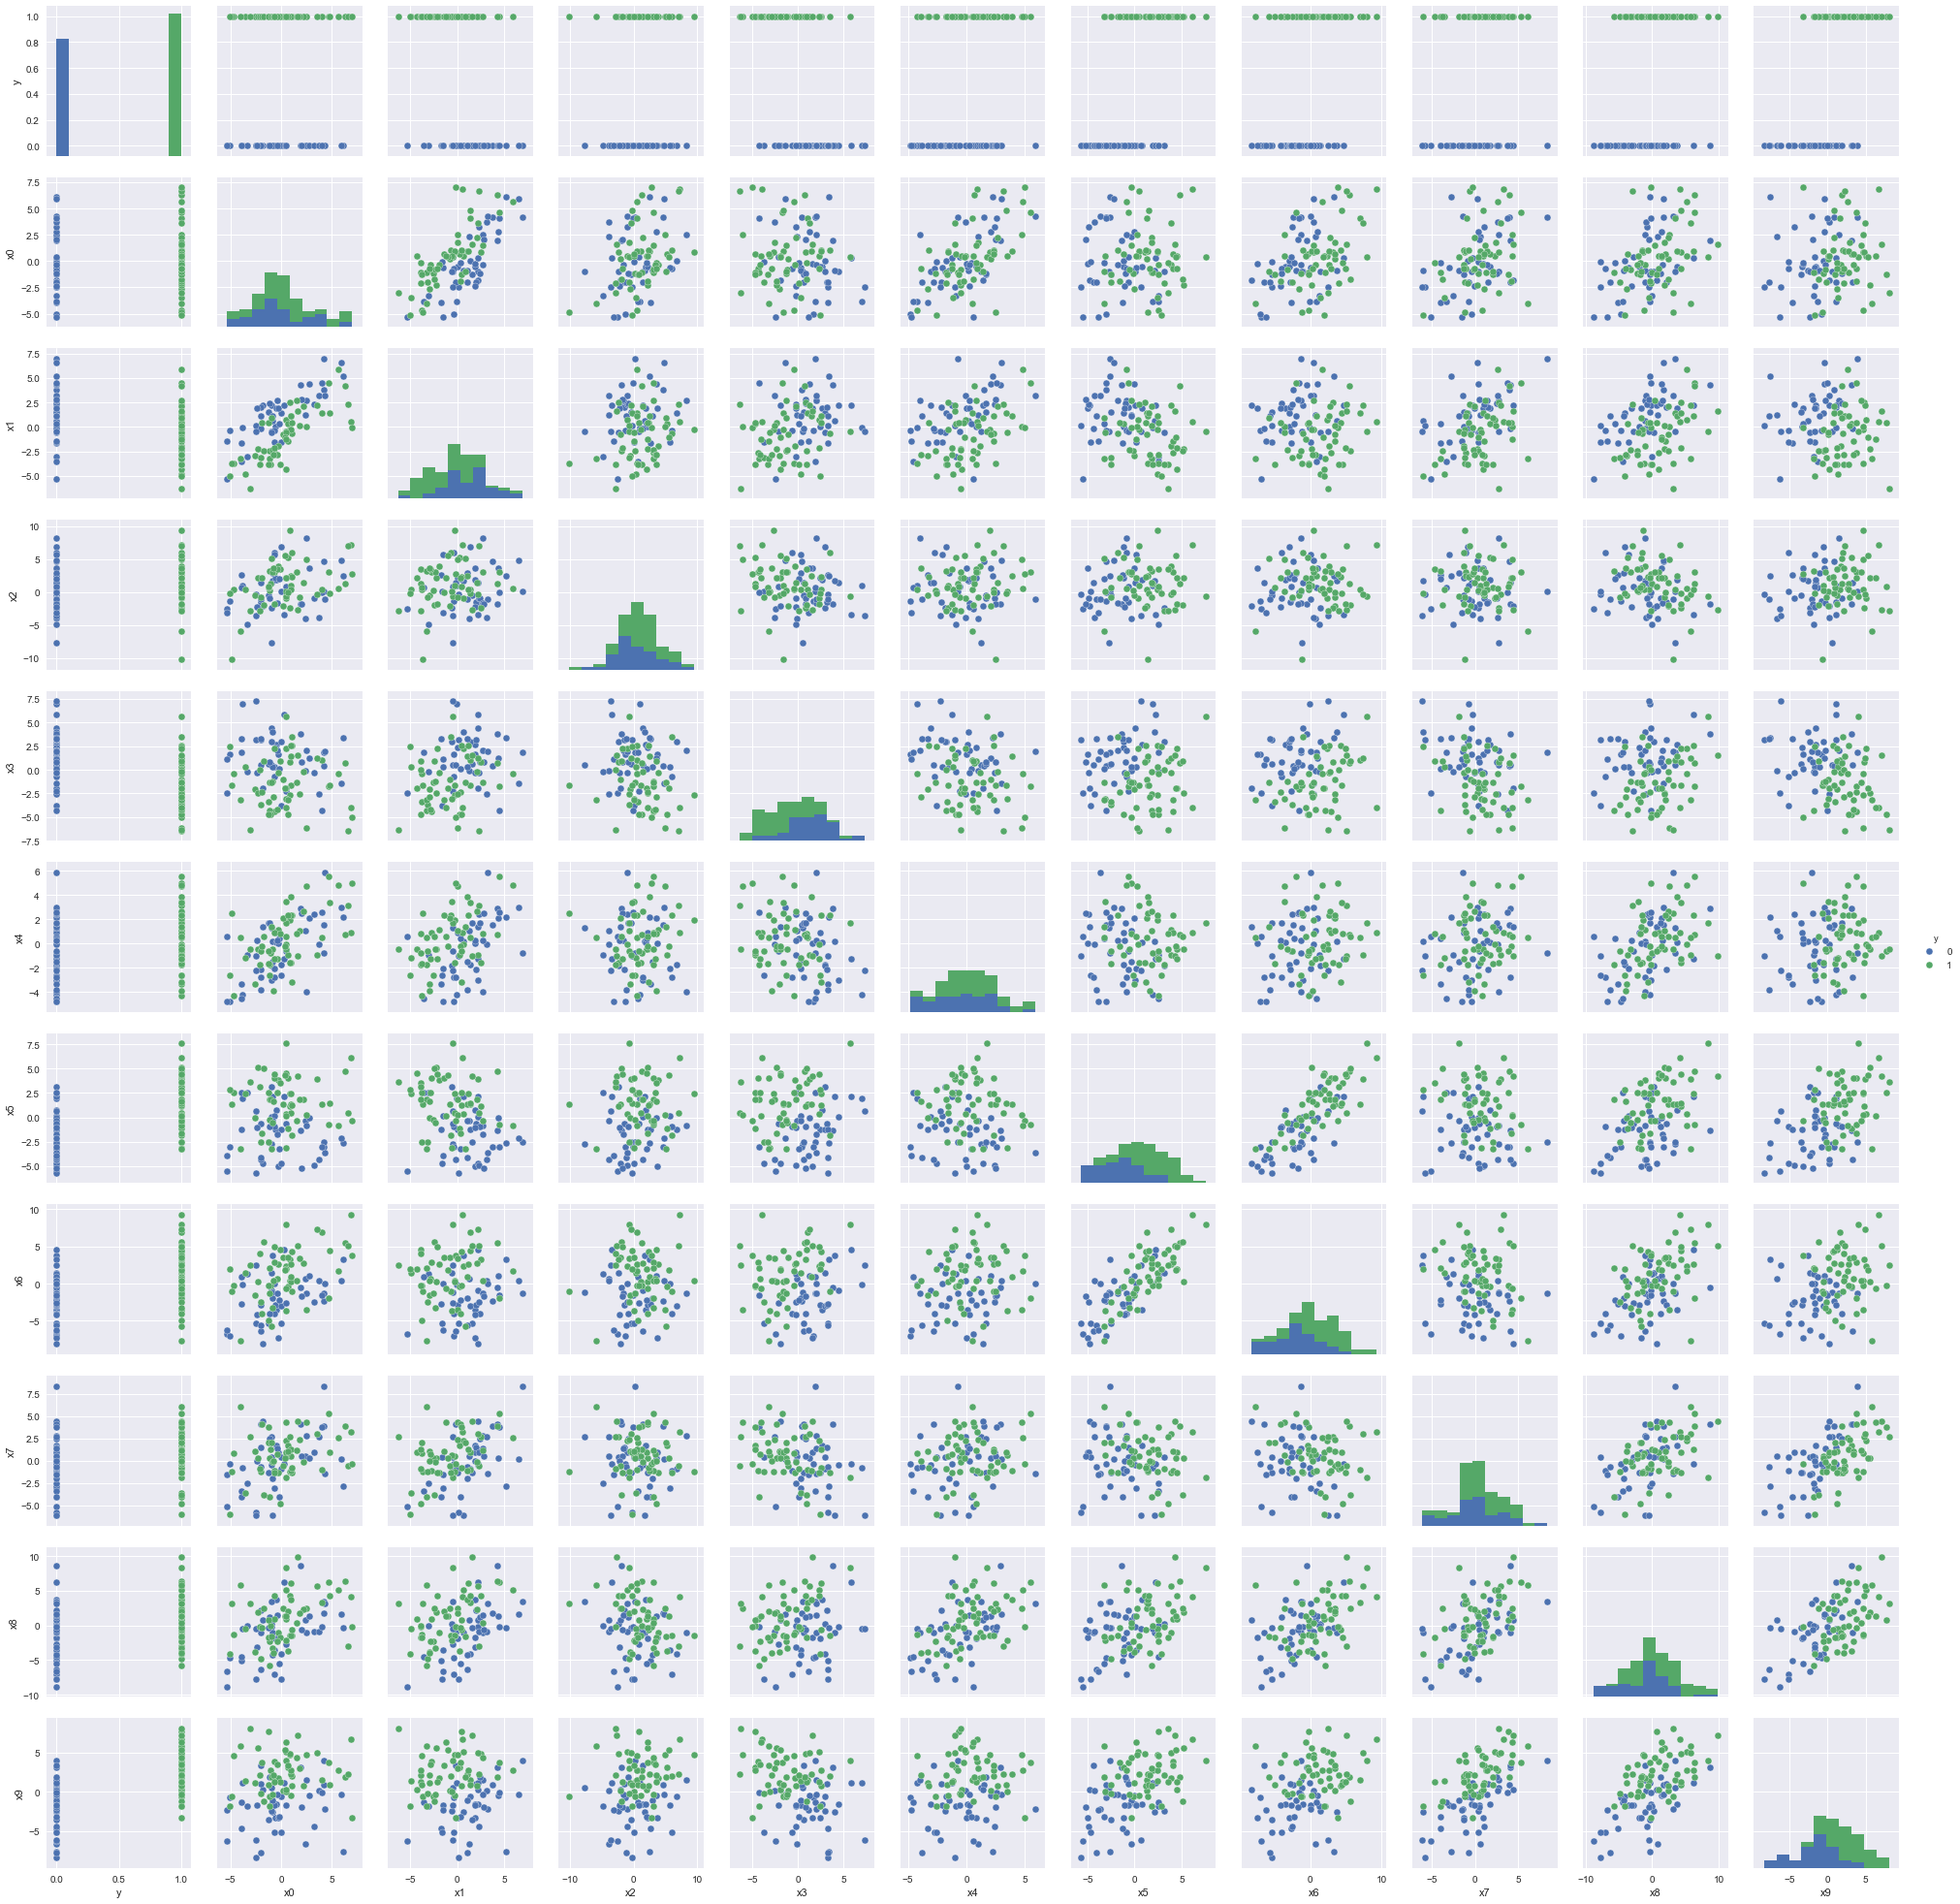

In [37]:
sns.pairplot(df,hue="y")

In [38]:
weights

array([-0.30221258, -1.20582822,  0.38191555, -0.36546454,  0.92793455,
        0.55840197,  1.15987383,  1.24904947, -0.52460821,  1.28395085])

In [40]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [52]:
dimensions = range(5) 
features = ["x"+str(i) for i in dimensions ]
clf = clf.fit(df[features], df["y"])

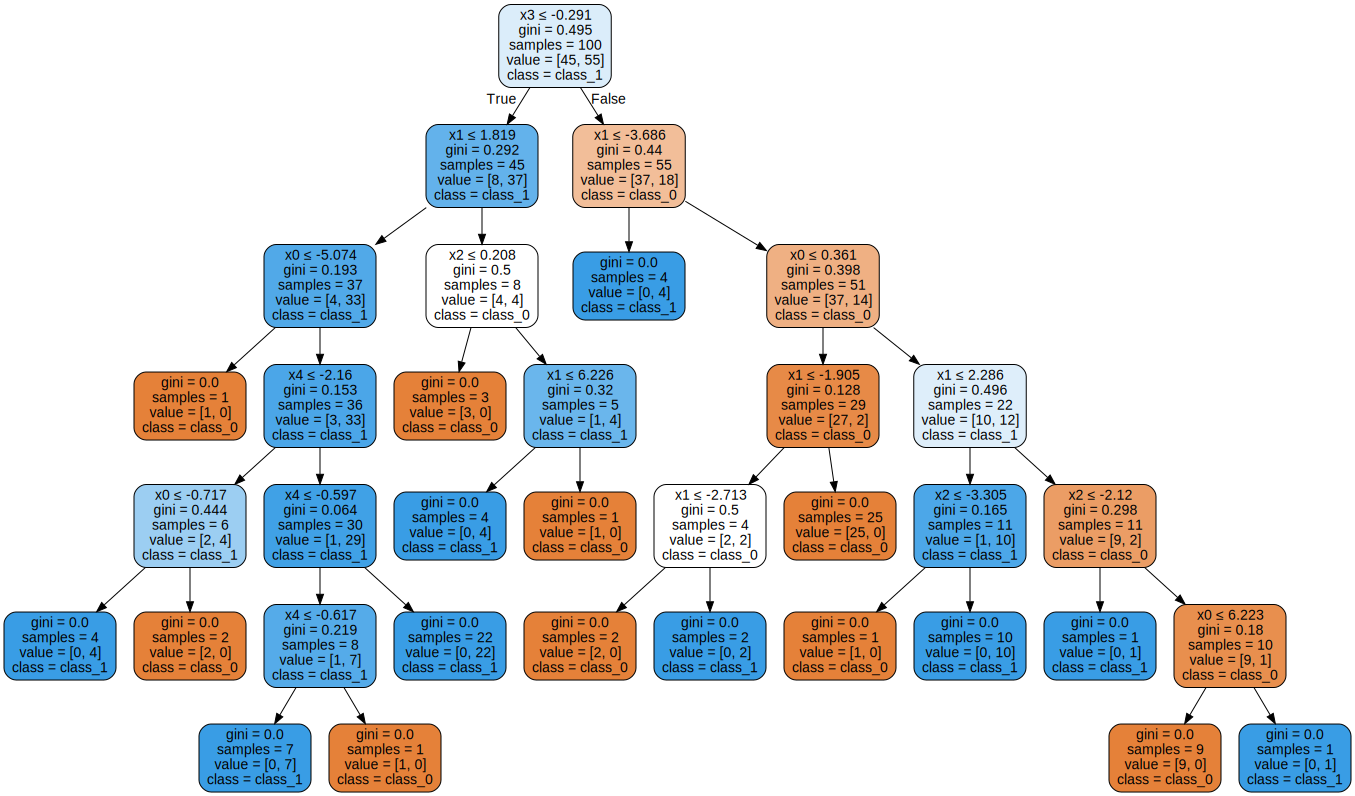

In [53]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=features,  
                         class_names=["class_0", "class_1"],  
                         filled=True, rounded=True,  
                         special_characters=True)  

graph = graphviz.Source(dot_data)  
graph 

In [54]:
clf.feature_importances_

array([ 0.23802623,  0.34479185,  0.11496786,  0.244975  ,  0.05723906])